In [10]:
from tensorflow import keras

In [2]:
from sklearn import datasets

iris = datasets.load_iris(return_X_y=True)
x = iris[0]
y = iris[1]

In [6]:
x
y
x.shape
y.shape

(150,)

In [8]:
datasets.load_iris()['feature_names']
datasets.load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
y = keras.utils.to_categorical(y)
y.shape

(150, 3)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
x_train.shape
x_test.shape

(30, 4)

In [23]:
modelo = keras.Sequential([
    keras.layers.InputLayer(
        input_shape=[4, ],
        name='layerInput'
    ),
    keras.layers.Dense(
        512,
        activation='relu',
        name='layerHiddenOne',
        kernel_initializer=keras.initializers.RandomNormal(seed=142)
    ),
    keras.layers.Dense(
        3,
        activation='softmax',
        name='layerOutput'
    )
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [24]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layerHiddenOne (Dense)               │ (None, 512)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layerOutput (Dense)                  │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,099 (16.01 KB)

 Trainable params: 4,099 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
modelo.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['categorical_accuracy']
)

In [29]:
epocas=100

historico = modelo.fit(
    x_train,
    y_train,
    epochs=epocas,
    validation_split=0.3
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - categorical_accuracy: 0.9626 - loss: 0.1151 - val_categorical_accuracy: 0.9722 - val_loss: 0.0972
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.9626 - loss: 0.1086 - val_categorical_accuracy: 1.0000 - val_loss: 0.0953
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.9645 - loss: 0.1005 - val_categorical_accuracy: 0.9444 - val_loss: 0.1103
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.9585 - loss: 0.1005 - val_categorical_accuracy: 0.9722 - val_loss: 0.1017
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.9704 - loss: 0.0993 - val_categorical_accuracy: 0.9722 - val_loss: 0.0927
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.9567 - loss: 0.1069 - val_categorical_accuracy: 0.9722 - val_loss: 0.0915
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.9548 - loss: 0.1116 - v

In [30]:
historico.history

{'categorical_accuracy': [0.9642857313156128,
  0.9642857313156128,
  0.9523809552192688,
  0.9404761791229248,
  0.9642857313156128,
  0.9523809552192688,
  0.9642857313156128,
  0.9642857313156128,
  0.988095223903656,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128,
  0.9523809552192688,
  0.9642857313156128,
  0.976190447807312,
  0.9523809552192688,
  0.9523809552192688,
  0.9523809552192688,
  0.9404761791229248,
  0.9642857313156128,
  0.976190447807312,
  0.9523809552192688,
  0.9642857313156128,
  0.9642857313156128,
  0.9523809552192688,
  0.9285714030265808,
  0.9642857313156128,
  0.9523809552192688,
  0.9642857313156128,
  0.9642857313156128,
  0.976190447807312,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128,
  0.9642857313156128,
  0.9523809552192688,
  0.9523809552192688,
  0.9523809552192688,
  0.9642857313156128,
  0.9642857313156128,
  0.976190447807312,
  0.964285731

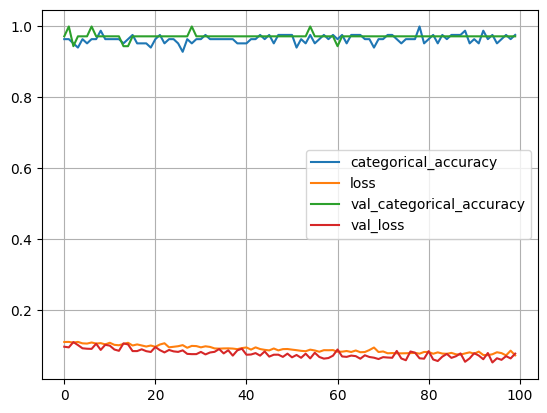

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

In [34]:
modelo.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.9667 - loss: 0.0739


[0.07391537725925446, 0.9666666388511658]

In [38]:
import numpy as np

test = np.array([[0.80, 0.60, 0.50, 0.30]])
modelo.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[1.2945279e-02, 9.8699552e-01, 5.9229184e-05]], dtype=float32)